In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats, signal
from scipy.fftpack import fft, fftfreq, ifft
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')

# Basic Info

In [711]:
d = {'Name': ['Steph', 'Nim', 'Beng'], 'Age': [21, 22, 22], 'Gender': ['F', 'F', 'M']}
dataframe = pd.DataFrame(data=d)
print(dataframe)

    Name  Age Gender
0  Steph   21      F
1    Nim   22      F
2   Beng   22      M


# Read Data

In [712]:
# different participant analysis
data_lemon = pd.read_csv("sensor-Lemon.csv")
data_steph = pd.read_csv("sensor-Steph.csv")
data_nim = pd.read_csv("sensor-Nim.csv")
data_beng = pd.read_csv("sensor-Beng.csv")

# left vs right analysis
data_left = pd.read_csv("sensor-steph-left.csv")
data_right = pd.read_csv("sensor-steph-right.csv")

In [713]:
# remove when person was not walking

# participant 1
#data_lemon = data_lemon.rename(columns={'aT (m/s^2)': 'atotal', 'ax (m/s^2)': 'ax', 'ay (m/s^2)': 'ay', 'az (m/s^2)': 'az'})
#data_lemon = data_lemon.iloc[2000:5960]
#data_lemon = data_lemon.iloc[500:2000]
# participant 2
#data_steph = data_steph.iloc[610:3075]
data_steph = data_steph.iloc[500:2500]
# participant 3
#data_nim = data_nim.iloc[1220:3330]
data_nim = data_nim.iloc[500:2500]
# participant 4
#data_beng = data_beng.iloc[560:2560]
data_beng = data_beng.iloc[500:2500]

#data = data_steph



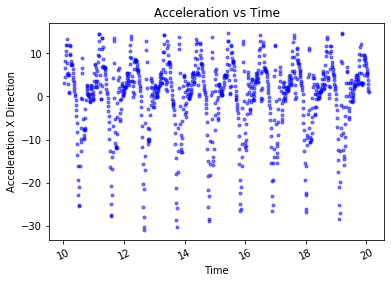

In [714]:
# plot the vector of the total acceleration against time
f =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['ax'],'b.', alpha=0.5) 
plt.xlabel('Time')
plt.ylabel('Acceleration X Direction')
plt.title('Acceleration vs Time')
#plt.legend()
plt.show()
#f.savefig("figure.png")

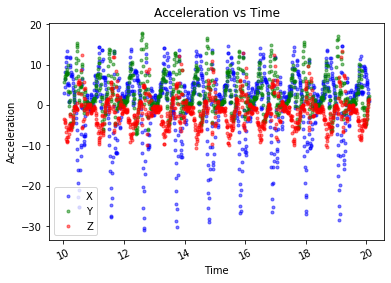

In [715]:
# plot of accelerations in x, y, and z direction
f1 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['ax'],'b.', alpha=0.5, label="X") 
plt.plot(data['time'], data['ay'],'g.', alpha=0.5, label="Y") 
plt.plot(data['time'], data['az'],'r.', alpha=0.5, label="Z") 
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration vs Time')
plt.legend()
plt.show()
#f1.savefig("figure1.png")

# Filter

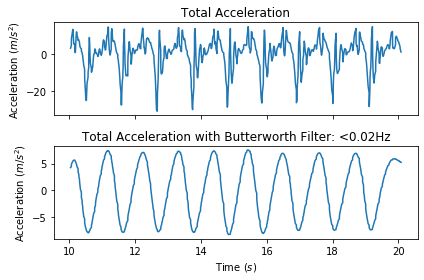

In [716]:
# Low-pass Buttermore filter to get rid of high frequency random noise
b,a = signal.butter(3, 0.03, btype='lowpass', analog=False)
data['low_pass'] = signal.filtfilt(b, a, data['ax'])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data['time'], data['ax'])
ax1.set_title('Total Acceleration')
ax1.set_ylabel('Acceleration ($m/s^2$)')
#ax1.axis([10, 15, -50, 50])

ax2.plot(data['time'], data['low_pass'])
ax2.set_title('Total Acceleration with Butterworth Filter: <0.02Hz')
#ax2.axis([10, 15, -50, 50])
plt.ylabel('Acceleration ($m/s^2$)')
plt.xlabel('Time ($s$)')
plt.tight_layout()
plt.show()
fig.savefig("figure2.png")

# FFT to get Step Frequency

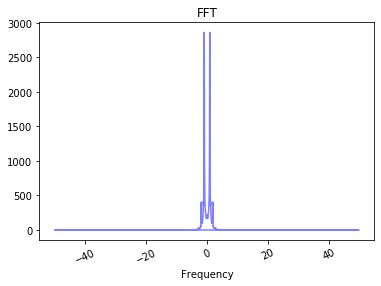

Peak:  0.9


In [717]:
# fourier transform
yf = abs(fft(data['low_pass']))
xf = fftfreq(data['time'].shape[0], 1/100)

f3 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(xf, yf,'b', alpha=0.5) 
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('FFT')
#plt.legend()
plt.show()

#f3.savefig("figure1.png")

# referenced: https://stackoverflow.com/questions/37049887/print-highest-peak-value-of-the-frequency-domain-plot
yf_mag = yf # find magnitude
max_y = np.max(yf_mag) # find max peak
loc_y = np.argmax(yf_mag) # find its location
freq_y = xf[loc_y] # get the actual frequency value
print('Peak: ', freq_y)

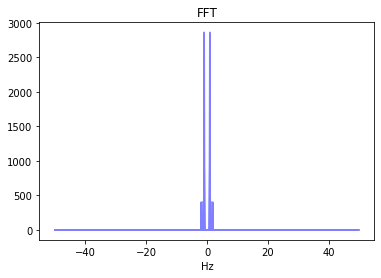

Second Peak:  1.0


In [718]:
# find the peak frequency

# referenced: https://stackoverflow.com/questions/59940645/how-do-i-get-peak-values-back-from-fourier-transform
f4 =  plt.figure()
threshold = 400
yf[yf<threshold] = 0
plt.plot(xf, abs(yf),'b', alpha=0.5) 
plt.xlabel('Hz')
plt.ylabel('')
plt.title('FFT')
#plt.legend()
plt.show()
#f4.savefig("figure4.png")

# peak frequency is 0 so try removing it and finding next highest peak
yf_no_max_peak = np.delete(yf, np.where(yf == max_y))
xf_no_max_peak = np.delete(xf, [loc_y])
yf_mag_2 = np.abs(yf_no_max_peak) # find magnitude
max_y_2 = np.max(yf_mag_2) # find max peak
loc_y_2 = np.argmax(yf_mag_2) # find its location
freq_y_2 = xf_no_max_peak[loc_y_2] # get the actual frequency value
print('Second Peak: ', freq_y_2)

In [719]:
# apply above analysis to all datasets

# Low-pass Buttermore filter to get rid of high frequency random noise
b,a = signal.butter(3, 0.02, btype='lowpass', analog=False)
#data_lemon['low_pass'] = signal.filtfilt(b, a, data_lemon['ax'])
data_steph['low_pass'] = signal.filtfilt(b, a, data_steph['ax'])
data_nim['low_pass'] = signal.filtfilt(b, a, data_nim['ax'])
data_beng['low_pass'] = signal.filtfilt(b, a, data_beng['ax'])

# fourier transform
#data_lemon['yf'] = abs(fft(data_lemon['low_pass']))
#data_lemon['xf'] = fftfreq(data_lemon['time'].shape[0], 1/100)
data_steph['yf'] = abs(fft(data_steph['low_pass']))
data_steph['xf'] = fftfreq(data_steph['time'].shape[0], 1/100)
data_nim['yf'] = abs(fft(data_nim['low_pass']))
data_nim['xf'] = fftfreq(data_nim['time'].shape[0], 1/100)
data_beng['yf'] = abs(fft(data_beng['low_pass']))
data_beng['xf'] = fftfreq(data_beng['time'].shape[0], 1/100)

# ANOVA

In [720]:
anova = stats.f_oneway(data_steph['yf'], data_nim['yf'], data_beng['yf'])
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=0.43809442823194544, pvalue=0.6452854980030407)
0.6452854980030407


In [721]:
f_data = { 'Steph': data_steph['yf'], 'Nim': data_nim['yf'], 'Beng':data_beng['yf']}
freq_dataframe = pd.DataFrame(data=f_data)
print(freq_dataframe)

           Steph         Nim         Beng
500   105.149580    3.616475  1472.785914
501   201.291376   91.631968   132.236667
502   227.629085  108.607908    88.606981
503   181.903963   33.642552   208.222596
504   220.026294   92.086877   144.741792
...          ...         ...          ...
2495  200.676631   93.152593   194.966493
2496  220.026294   92.086877   144.741792
2497  181.903963   33.642552   208.222596
2498  227.629085  108.607908    88.606981
2499  201.291376   91.631968   132.236667

[2000 rows x 3 columns]


In [722]:
frequency_melt = pd.melt(freq_dataframe)
posthoc = pairwise_tukeyhsd(
    frequency_melt['value'], frequency_melt['variable'],
    alpha=0.05)

In [723]:
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Beng    Nim   3.7212 0.6429  -6.2464 13.6889  False
  Beng  Steph   0.6382    0.9  -9.3295 10.6058  False
   Nim  Steph  -3.0831 0.7287 -13.0508  6.8846  False
-----------------------------------------------------


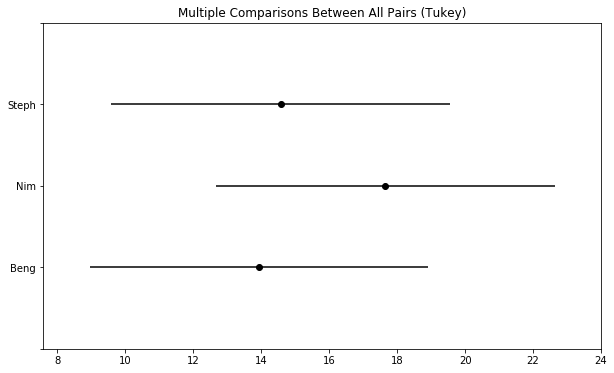

In [724]:
fig = posthoc.plot_simultaneous()

In [662]:
dataframe['Step Frequency'] = [0.9333333333333333, 0.8, 1.0666666666666667]
dataframe

Name  Age Gender  Step Frequency
0  Steph   21      F        0.933333
1    Nim   22      F        0.800000
2   Beng   22      M        1.066667

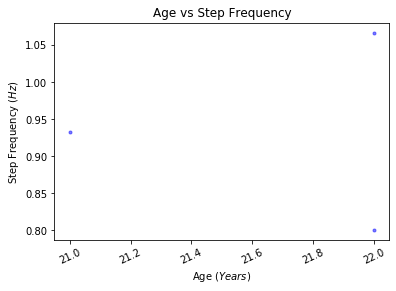

In [685]:
f3 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(dataframe['Age'], dataframe['Step Frequency'],'b.', alpha=0.5) 
plt.xlabel('Age ($Years$)')
plt.ylabel('Step Frequency ($Hz$)')
plt.title('Age vs Step Frequency')
#plt.legend()
plt.show()

In [705]:
data_lemon = pd.read_csv("sensor-Lemon.csv")
data_steph = pd.read_csv("sensor-Steph.csv")
data_nim = pd.read_csv("sensor-Nim.csv")
data_beng = pd.read_csv("sensor-Beng.csv")

data_steph = data_steph.iloc[500:2500]
data_nim = data_nim.iloc[500:2500]
data_beng = data_beng.iloc[500:2500]


In [706]:
data_lemon

time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0        0.004810      0.0717      0.0073     -0.0041       0.072
1        0.005495      0.1182     -0.0615      0.0380       0.139
2        0.005909      0.1218     -0.0633      0.1131       0.178
3        0.006285      0.0778     -0.0080      0.0759       0.109
4        0.015850      0.0272     -0.0056      0.0438       0.052
...           ...         ...         ...         ...         ...
43937  221.207737      0.1638     -0.1303      0.3099       0.374
43938  221.210373      0.2130     -0.1345     -0.3669       0.445
43939  221.215323      0.2621     -0.1871     -0.8219       0.883
43940  221.220376      0.1885     -0.2031     -1.0125       1.050
43941  221.225658      0.0286     -0.1559     -1.1336       1.145

[43942 rows x 5 columns]

In [707]:
time_between_samples = 0.01

acceleration_list = data_nim['ax']

velocity_list = [sum(acceleration_list[:i]) * time_between_samples for i in range(len(acceleration_list))]
position_list = [sum(velocity_list[:i]) * time_between_samples for i in range(len(velocity_list))]


In [708]:
print(position_list[-1])

13.498121
